In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

# Example 1 - Shallow Neural Network

Here, we define a simple, shallow neural network with three hidden units, like the one we had in our example.
First, we define the model layers and the 'forward pass'. Next, we instantiate the model, and pass a one-dimensional tensor with value 1.0 through the network.

In [3]:
# Define the neural network
class ShallowNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(1, 3)  # Input to hidden layer
        self.output = nn.Linear(3, 1)  # Hidden to output layer
    
    def forward(self, x):
        x = self.hidden(x)
        x = F.relu(x)
        x = self.output(x)
        return x

# Create an instance of the network
shallow_model = ShallowNN()

# Example input
x = torch.tensor([[1.0]], dtype=torch.float32)

# Forward pass
output = shallow_model(x)
print(f"Input shape: {x.shape}")
print(f"Output shape: {output.shape}")
print(f"Output value: {output.item()}")


Input shape: torch.Size([1, 1])
Output shape: torch.Size([1, 1])
Output value: -0.30589455366134644


In [4]:
theta10, theta11 = -0.2, 1.0
theta20, theta21 = 1.2, -1.5
theta30, theta31 = -2.0, 5.0

phi0, phi1, phi2, phi3 = 0.0, 0.9, 1.6, 1.0

In [5]:
shallow_model.hidden.weight = nn.Parameter(torch.tensor([[theta11, theta21, theta31]]).reshape(3, 1), requires_grad=False)
shallow_model.hidden.bias = nn.Parameter(torch.tensor([theta10, theta20, theta30]).reshape(1, 3), requires_grad=False)

shallow_model.output.weight = nn.Parameter(torch.tensor([[phi1, phi2, phi3]]).reshape(1, 3), requires_grad=False)
shallow_model.output.bias = nn.Parameter(torch.tensor([phi0]), requires_grad=False)

In [6]:
xx = torch.linspace(0, 1, 100).reshape(-1, 1)

pre_activations = shallow_model.hidden(xx).detach().numpy()
pre1 = pre_activations[:, 0]
pre2 = pre_activations[:, 1]
pre3 = pre_activations[:, 2]
yy = shallow_model(xx).detach().numpy()

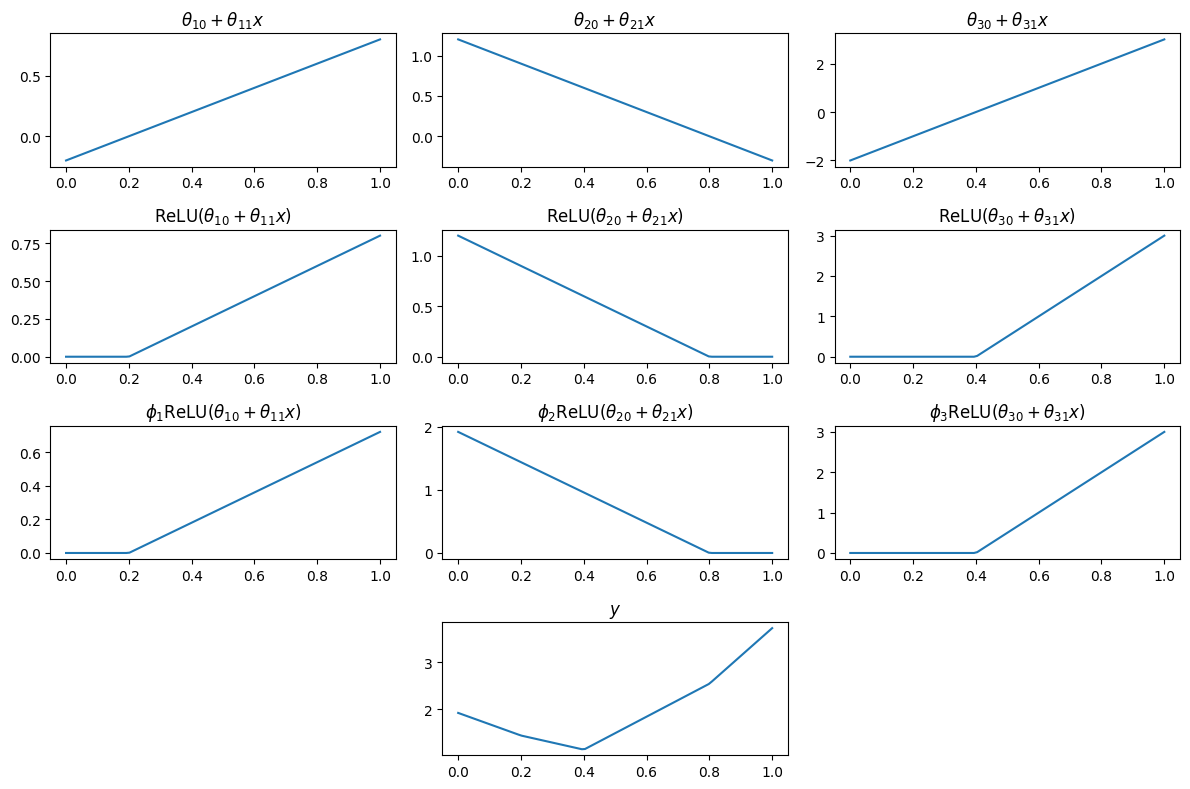

In [7]:
def relu(x):
    return np.maximum(0, x)


fig, axes = plt.subplot_mosaic(
    [
        ["pre1", "pre2", "pre3"],
        ["h1", "h2", "h3"],
        ["post1", "post2", "post3"],
        [".", "y", "."]
    ],
    figsize=(12, 8),
)

axes["pre1"].plot(xx, pre1)
axes["pre1"].set_title(r"$\theta_{10} + \theta_{11} x$")
axes["pre2"].plot(xx, pre2)
axes["pre2"].set_title(r"$\theta_{20} + \theta_{21} x$")
axes["pre3"].plot(xx, pre3)
axes["pre3"].set_title(r"$\theta_{30} + \theta_{31} x$")

axes["h1"].plot(xx, relu(pre1))
axes["h1"].set_title(r"$\text{ReLU}(\theta_{10} + \theta_{11} x)$")
axes["h2"].plot(xx, relu(pre2))
axes["h2"].set_title(r"$\text{ReLU}(\theta_{20} + \theta_{21} x)$")
axes["h3"].plot(xx, relu(pre3))
axes["h3"].set_title(r"$\text{ReLU}(\theta_{30} + \theta_{31} x)$")

axes["post1"].plot(xx, phi1 * relu(pre1))
axes["post1"].set_title(r"$\phi_{1} \text{ReLU}(\theta_{10} + \theta_{11} x)$")
axes["post2"].plot(xx, phi2 * relu(pre2))
axes["post2"].set_title(r"$\phi_{2} \text{ReLU}(\theta_{20} + \theta_{21} x)$")
axes["post3"].plot(xx, phi3 * relu(pre3))
axes["post3"].set_title(r"$\phi_{3} \text{ReLU}(\theta_{30} + \theta_{31} x)$")

axes["y"].plot(xx, yy)
axes["y"].set_title(r"$y$")

plt.tight_layout()
plt.show()